<a href="https://colab.research.google.com/github/hr1378/ML-Projects/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:


!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-11-21 15:52:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   101MB/s    in 4.9s    

2024-11-21 15:53:02 (101 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} in {dirpath}")


there are 2 directories and 0 in 10_food_classes_all_data
there are 10 directories and 0 in 10_food_classes_all_data/test
there are 0 directories and 250 in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 in 10_food_classes_all_data/test/steak
there are 0 directories and 250 in 10_food_classes_all_data/test/grilled_salmon
there are 0 directories and 250 in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 in 10_food_classes_all_data/test/chicken_curry
there are 10 directories and 0 in 10_food_classes_all_data/train
there are 0 directories and 750 in 10_food_classes_all_data/train

In [ ]:


train_dir="10_food_classes_all_data/train"
test_dir="/content/10_food_classes_all_data/test"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import random


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3848905.jpg']
Image shape: (342, 512, 3)


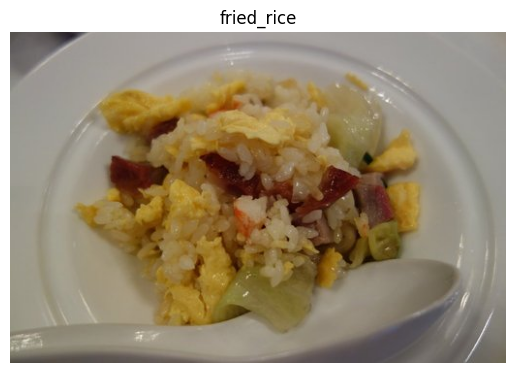

In [ ]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Activation
from tensorflow.keras.optimizers import Adam


model1=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])


model1.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

history1=model1.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.0814 - loss: 2.3320 - val_accuracy: 0.0781 - val_loss: 2.3074
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.0928 - loss: 2.3018 - val_accuracy: 0.1094 - val_loss: 2.2844
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.0861 - loss: 2.2798 - val_accuracy: 0.1719 - val_loss: 2.2133
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.1158 - loss: 2.2963 - val_accuracy: 0.0938 - val_loss: 2.2605
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.1246 - loss: 2.2372 - val_accuracy: 0.1406 - val_loss: 2.2261


In [ ]:
model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.1885 - loss: 2.1783


[2.1772429943084717, 0.18559999763965607]

In [ ]:
len(train_data)

235

In [ ]:
len(test_data)

79

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data)-1,
                        validation_data=test_data,
                        validation_steps=len(test_data)-1)

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.5632 - loss: 1.3155 - val_accuracy: 0.3257 - val_loss: 2.1483
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.5625 - loss: 1.3023 - val_accuracy: 0.5000 - val_loss: 1.5253
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


234/234 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.7740 - loss: 0.7330 - val_accuracy: 0.2756 - val_loss: 2.9305
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - accuracy: 0.5938 - loss: 0.9021 - val_accuracy: 0.2500 - val_loss: 2.7362
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.9197 - loss: 0.2966 - val_accuracy: 0.2544 - val_loss: 3.9112


In [ ]:
print(f"Total training samples: {train_data.samples}")
print(f"Total validation samples: {test_data.samples}")
print(f"Training batches: {len(train_data)}")
print(f"Validation batches: {len(test_data)}")


Total training samples: 7500
Total validation samples: 2500
Training batches: 235
Validation batches: 79


In [ ]:
235*32

7520

In [ ]:
model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.1659 - loss: 2.1817


[2.1772422790527344, 0.18559999763965607]

In [ ]:
model2=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax"),

])

model2.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

history2=model2.fit(train_data,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=5)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 123ms/step - accuracy: 0.1712 - loss: 2.5980 - val_accuracy: 0.3076 - val_loss: 1.9662
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.3898 - loss: 1.7792 - val_accuracy: 0.3212 - val_loss: 1.9757
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.5566 - loss: 1.3844 - val_accuracy: 0.3000 - val_loss: 2.1346


In [ ]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1./255.,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model3=tf.keras.models.clone_model(model2)

In [ ]:
model3.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [ ]:
model3.fit(train_data_augmented,
           epochs=5,
           steps_per_epoch=len(train_data_augmented),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 436ms/step - accuracy: 0.1708 - loss: 2.2336 - val_accuracy: 0.3204 - val_loss: 1.9419
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 405ms/step - accuracy: 0.2884 - loss: 2.0319 - val_accuracy: 0.3516 - val_loss: 1.8644
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 404ms/step - accuracy: 0.3109 - loss: 1.9943 - val_accuracy: 0.3572 - val_loss: 1.8700


In [ ]:
model3.evaluate()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
list(class_names)